In [1]:
import __init__
import pickle
import pandas as pd
import datetime as dt

from data_loader import DataLoader
from data_set import UserPayInfoBase
from utils.multi_processor import MultiProcessor

In [2]:
%time loader_data = DataLoader.load_data()
shop_info = loader_data['shop_info']
user_pay = loader_data['user_pay']
user_view = loader_data['user_view']

CPU times: user 1min 20s, sys: 8.59 s, total: 1min 29s
Wall time: 1min 30s


In [3]:
def generator(shop_id):
    shop_info_data = shop_info.iloc[shop_id - 1].to_dict()
    user_pay_data = user_pay[user_pay.shop_id == shop_id]
    user_pay_data = user_pay_data.sort_values(by='time_stamp')
    user_pay_data['date'] = user_pay_data['time_stamp'].apply(lambda x: x[:10])
    ordinary_dates = list(set(user_pay_data['date']))
    ordinary_dates.sort()
    user_pay_info = UserPayInfoBase(shop_id, shop_info_data, ordinary_dates)
    user_pay_info.set_flow(user_pay_data, ordinary_dates)
    return (shop_id, user_pay_info)

In [ ]:
shop_ids = range(1, 2001)
start_time = dt.datetime.now()
processor = MultiProcessor(generator, shop_ids)
result = processor.pool_map_async_result(processors=16)
result = dict(result)
end_time = dt.datetime.now()
print 'Processing time is {}'.format(end_time - start_time)
pickle.dump(result, open('user_pay_info', 'w+'))

In [14]:
x = pickle.load(open('user_pay_info', 'r+'))

In [10]:
result[0][1].get_flow('2016-01-01', style='d')

{'2016-01-01': 235}

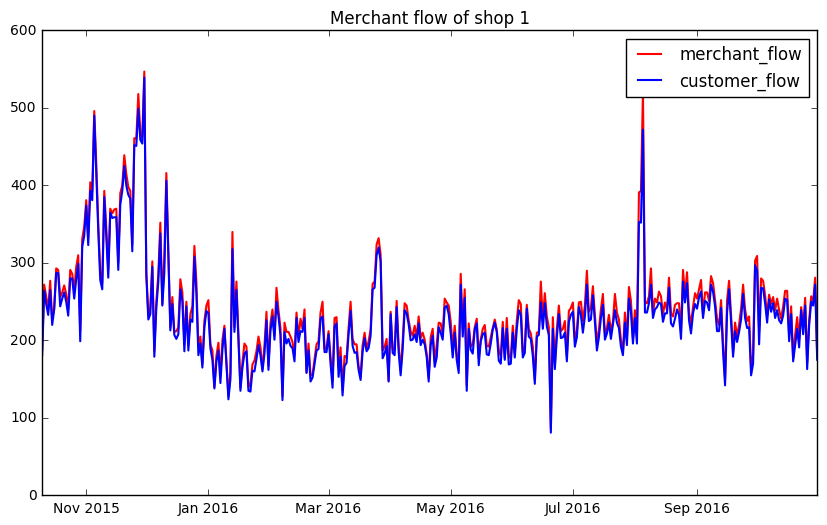

In [7]:
result[0][1].plot_flow(style='mc')